In [1]:
from PIL import Image
import cv2 
import numpy as np
# import requests

In [2]:
img = Image.open("./highway.png")
img = img.resize((450, 250))
# img

In [3]:
img_array = np.array(img)
# img_array

In [4]:
img_gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
# Image.fromarray(img_gray)

In [6]:
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
# Image.fromarray(img_blur)

In [7]:
img_dilate = cv2.dilate(img_blur, np.ones((3,3)));
# Image.fromarray(img_dilate)

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
final_image = cv2.morphologyEx(img_dilate, cv2.MORPH_CLOSE, kernel)
# Image.fromarray(final_image)

In [9]:
cascade_source = './cars.xml'
car_cascade = cv2.CascadeClassifier(cascade_source)
cars = car_cascade.detectMultiScale(final_image, 1.1, 1)

In [12]:
# amount of cars detected
print(len(cars))
cars[0]

21


array([250,  35,  25,  25], dtype=int32)

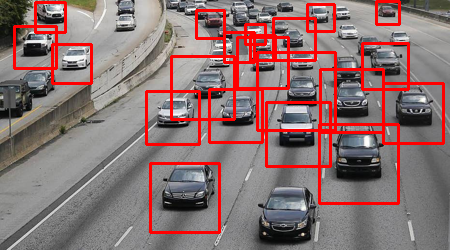

In [11]:
# draw rectangles around detected cars
for(x, y, w, h) in cars:
    cv2.rectangle(img_array, (x, y), (x + w, y + h), (255, 0, 0), 2)

Image.fromarray(img_array)

In [ ]:
img = Image.open("./cars_1.jpeg")
img = img.resize((450, 250))
img_array = np.array(img)
img_gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
img_dilate = cv2.dilate(img_blur, np.ones((3,3)));
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
final_image = cv2.morphologyEx(img_dilate, cv2.MORPH_CLOSE, kernel)
cars = car_cascade.detectMultiScale(final_image, 1.1, 1)

for(x, y, w, h) in cars:
    cv2.rectangle(img_array, (x, y), (x + w, y + h), (255, 0, 0), 2)

Image.fromarray(img_array)


In [15]:
len(cars)

10

In [1]:
from PIL import Image
import cv2 
import numpy as np

In [2]:
v1 = './Cars.mp4'
v2 = './traffic_1.mp4'
cascade_source = './cars.xml'
car_cascade = cv2.CascadeClassifier(cascade_source)

In [ ]:
def detect_cars(video_source):
    
    capture = cv2.VideoCapture(video_source)

    # frames_list = []

    while True:
        ret, frames = capture.read()

        if not ret:
            break

        img_gray = cv2.cvtColor(frames, cv2.COLOR_RGB2GRAY)
        img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
        img_dilate = cv2.dilate(img_blur, np.ones((3,3)));
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
        final_image = cv2.morphologyEx(img_dilate, cv2.MORPH_CLOSE, kernel)
        cars = car_cascade.detectMultiScale(final_image, 1.1, 1)

        for(x, y, w, h) in cars:
            cv2.rectangle(frames, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # frames_list.append(frames) 
        
        cv2.imshow('video', frames)
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  
            break

    capture.release() 
    cv2.destroyAllWindows()
    # return frames_list

In [ ]:
detect_cars(v1)

In [ ]:
import concurrent.futures

video_sources = [v1,v2]

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(executor.map(detect_cars, video_sources))

for video_frames in zip(*results):  
    combined_frame = np.hstack(video_frames)

    cv2.imshow('Videos', combined_frame)
    
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  
        break

cv2.destroyAllWindows()

2025-04-28 12:43:04.756 Python[41384:3820667] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-28 12:43:04.756 Python[41384:3820667] +[IMKInputSession subclass]: chose IMKInputSession_Modern


: 

In [ ]:
def process_frame(frame):
    gray   = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur   = cv2.GaussianBlur(gray, (5, 5), 0)
    dil    = cv2.dilate(blur, np.ones((3,3)), iterations=1)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    final  = cv2.morphologyEx(dil, cv2.MORPH_CLOSE, kernel)
    cars   = car_cascade.detectMultiScale(final, 1.1, 1)
    for (x, y, w, h) in cars:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
    return frame, len(cars)

def detect_two_videos(path1, path2):

    cap1 = cv2.VideoCapture(path1)
    cap2 = cv2.VideoCapture(path2)

    if not cap1.isOpened() or not cap2.isOpened():
        print("video is corrupted or not found")
        return

    while True:
        ret1, f1 = cap1.read()
        ret2, f2 = cap2.read()

        if not ret1 and not ret2:
            break

        if not ret1 and ret2:
            f1 = np.zeros_like(f2)
        if not ret2 and ret1:
            f2 = np.zeros_like(f1)

        out1, count1 = process_frame(f1)
        out2, count2 = process_frame(f2)

        combined = cv2.hconcat([out1, out2])


        text = f"V1: {count1} autos    V2: {count2} autos"

        cv2.rectangle(combined,
                      (0, 0),
                      (combined.shape[1], 30),
                      (0, 0, 0),
                      thickness=-1)
        # Texto
        cv2.putText(combined,
                    text,
                    (10, 20),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    (0, 255, 0),
                    2)


        cv2.imshow('Videos Lado a Lado', combined)
        if cv2.waitKey(1) & 0xFF == 27:  # ESC para salir
            break

    cap1.release()
    cap2.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    detect_two_videos(v1, v2)


2025-04-28 13:19:58.969 Python[41712:3850128] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-28 13:19:58.969 Python[41712:3850128] +[IMKInputSession subclass]: chose IMKInputSession_Modern


: 